## GPU 드라이버 확인

In [1]:
from platform import python_version
import sys
import site
import numpy as np
import mmcv 

print('python version :' ,python_version())
print('interpreter path :' , sys.executable)
print('site-package path :' , site.getsitepackages())
print('numpy version :' , np.__version__)
print('mmcv version :' , mmcv.__version__)

python version : 3.8.13
interpreter path : /home/user304/anaconda3/envs/openmmlab/bin/python
site-package path : ['/home/user304/anaconda3/envs/openmmlab/lib/python3.8/site-packages']
numpy version : 1.23.0
mmcv version : 1.7.0


/home/user304/anaconda3/envs/openmmlab/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## DL framework

In [2]:
import tensorflow as tf
import torch

## tensorflow 
print(f'tf.__version__: {tf.__version__}')
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

## torch
print(f'torch.__version__: {torch.__version__}')
print(f'GPU 사용여부: {torch.cuda.is_available()}')
gpu_count = torch.cuda.device_count()
print(f'GPU count: {gpu_count}')
if gpu_count > 0:
    print(f'GPU name: {torch.cuda.get_device_name(0)}')

tf.__version__: 2.9.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
torch.__version__: 1.12.1+cu113
GPU 사용여부: True
GPU count: 1
GPU name: GeForce RTX 3090


# GPU 셋팅 관련 코드

In [3]:
import os

# cuda가 사용 가능한 지 확인
torch.cuda.is_available()

# cuda가 사용 가능하면 device에 "cuda"를 저장하고 사용 가능하지 않으면 "cpu"를 저장한다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 멀티 GPU 사용 시 사용 가능한 GPU 셋팅 관련
# 아래 코드의 "0,1,2"는 GPU가 3개 있고 그 번호가 0, 1, 2 인 상황의 예제입니다.
# 만약 GPU가 5개이고 사용 가능한 것이 0, 3, 4 라면 "0,3,4" 라고 적으면 됩니다.
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

# 현재 PC의 사용가능한 GPU 사용 갯수 확인
torch.cuda.device_count()

# 사용 가능한 device 갯수에 맞춰서 0번 부터 GPU 할당
os.environ["CUDA_VISIBLE_DEVICES"] = ",".join(list(map(str, list(range(torch.cuda.device_count())))))

# cudnn을 사용하도록 설정. GPU를 사용하고 있으면 기본값은 True 입니다.
import torch.backends.cudnn as cudnn
cudnn.enabled = True

# inbuilt cudnn auto-tuner가 사용 중인 hardware에 가장 적합한 알고리즘을 선택하도록 허용합니다.
cudnn.benchmark = True

In [4]:
# unit : byte
torch.cuda.get_device_properties("cuda:0").total_memory

# unit : mega byte
torch.cuda.get_device_properties("cuda:0").total_memory // 1e6

# unit : giga byte
torch.cuda.get_device_properties("cuda:0").total_memory // 1e9

25.0

In [5]:
gpu_ids = list(map(str, list(range(torch.cuda.device_count()))))
total_gpu_memory = 0
for gpu_id in gpu_ids:
    total_gpu_memory += torch.cuda.get_device_properties("cuda:" + gpu_id).total_memory

# 재현성 검증

In [6]:
import random

seed=1
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

## 한글 자연어 처리 패키지

## 머신러닝 패키지 확인

In [7]:
import sklearn
import lightgbm
import xgboost

print(f'lightgbm: {lightgbm.__version__}\nxgboost: {xgboost.__version__}\nsklearn: {sklearn.__version__}')

lightgbm: 2.3.1
xgboost: 0.90
sklearn: 0.23.2


## 한글 폰트 시각화 확인

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print(f'matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 6)

matplotlib: 3.5.1
pandas: 1.4.1


In [11]:
import matplotlib
import matplotlib.font_manager

len([f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name])

31

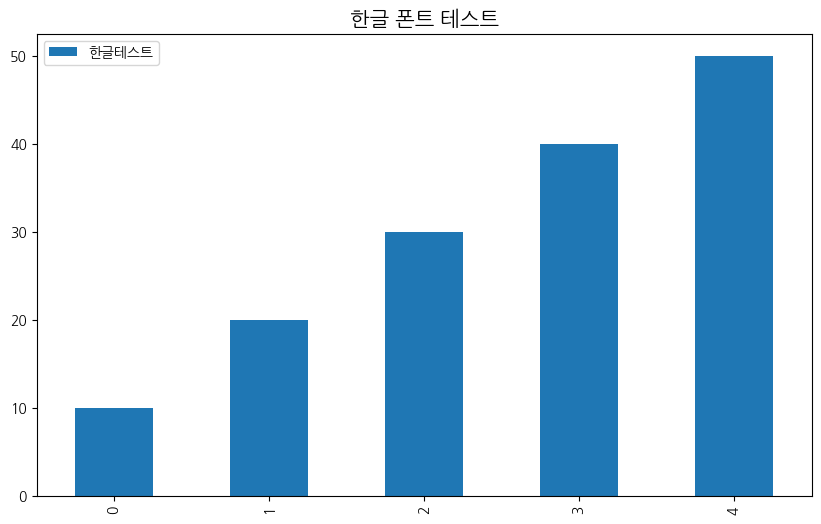

In [12]:
# NanumGothic
plt.rcParams['font.family'] = "NanumGothic"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

## XGBoost CPU & GPU 학습시간 비교

In [23]:
import time
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

def model_test(model_name, model):
    x, y = make_regression(n_samples=100000, n_features=10)
    
    start_time = time.time()
    model.fit(x, y)
    end_time = time.time()
    return f'{model_name}: 소요시간: {(end_time - start_time)} 초'

xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror',  
                   n_jobs = 10
                  )

print(model_test('xgb (cpu)', xgb))

xgb (cpu): 소요시간: 9.11060357093811 초


In [21]:
xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror', 
                   tree_method='gpu_hist')

print(model_test('xgb (gpu)', xgb))

xgb (gpu): 소요시간: 1.33583402633667 초
